<a href="https://colab.research.google.com/github/AdityaSareen06/eda_project/blob/main/22BDS0311_Phase1_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1 – EDA Project (22BDS0311)
Dataset: Insurance Dataset – Aditya Sareen – Roll Number: 22BDS0311

# Step 1 : Load dataset


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Summary Statistics & Data Info

In [9]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1337.000000,1338.000000,1337,1337,1338.000000
unique,NaN,3,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.207025,NaN,30.658657,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098003,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.675000,2.000000,NaN,NaN,16639.912515


## Step 3: Data Cleaning

In [13]:
# 1. Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 2. Check for missing values (reconfirm)
print("\nMissing values after dropping duplicates:")
print(df.isnull().sum())

# 3. Detect outliers using IQR method (for 'charges')
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print("\nNumber of outliers in 'charges':", outliers.shape[0])

# 4. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 5. Final cleaned dataset preview
df_encoded.head()

Number of duplicate rows: 0

Missing values after dropping duplicates:
age         0
sex         0
bmi         1
children    0
smoker      1
region      0
charges     0
dtype: int64

Number of outliers in 'charges': 139


,age,bmi,children,charges,sex_female,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,False,True,False,False


In [11]:
# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,False,True,False,False


## Step 4: Univariate Analysis

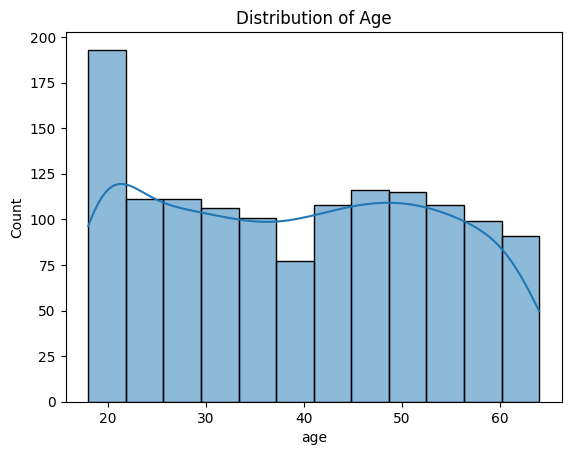

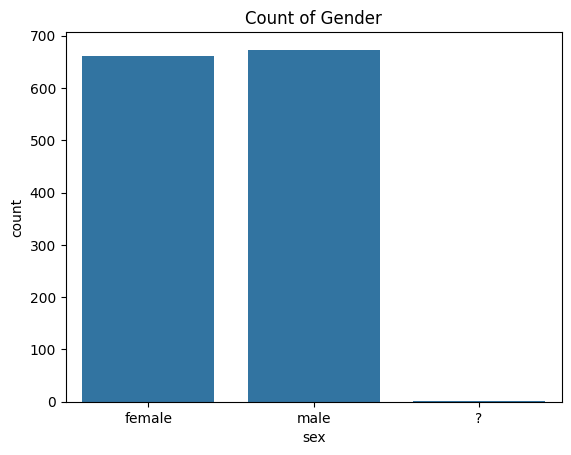

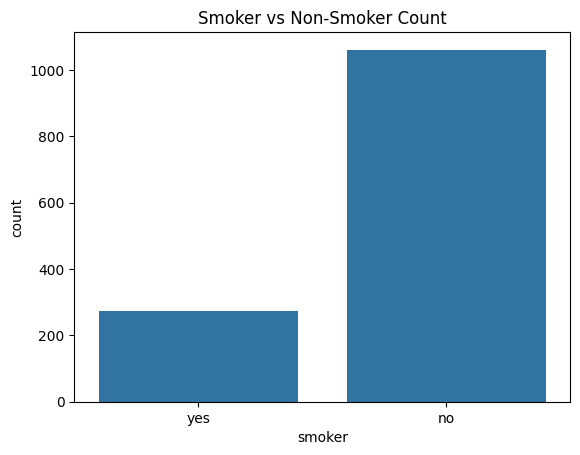

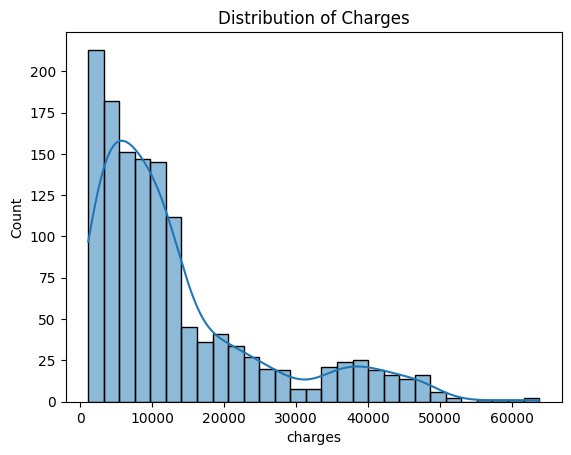

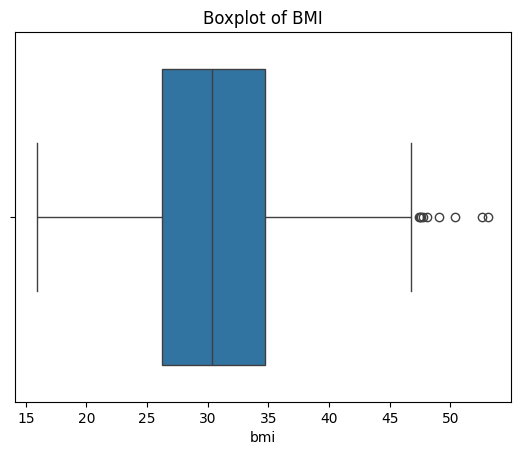

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")
plt.show()

# Gender count
sns.countplot(x='sex', data=df)
plt.title("Count of Gender")
plt.show()

# Smoker distribution
sns.countplot(x='smoker', data=df)
plt.title("Smoker vs Non-Smoker Count")
plt.show()

# Charges distribution
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

# Boxplot for BMI
sns.boxplot(x='bmi', data=df)
plt.title("Boxplot of BMI")
plt.show()

## Step 5: Bivariate Analysis

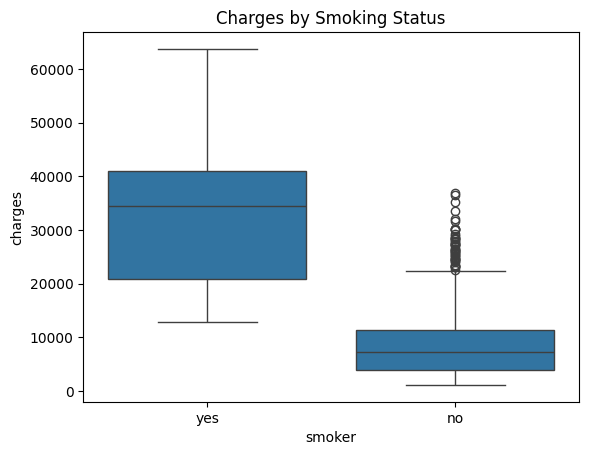

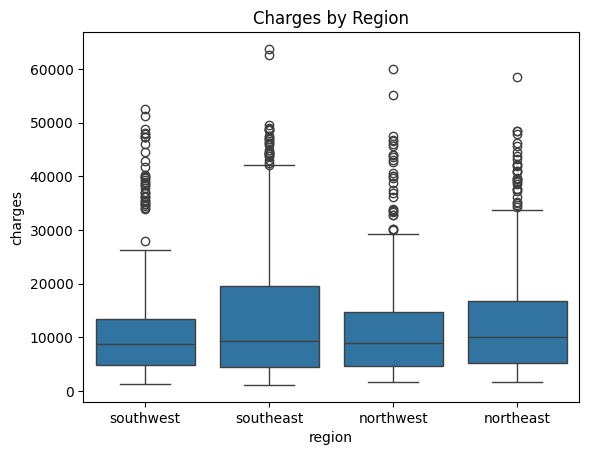

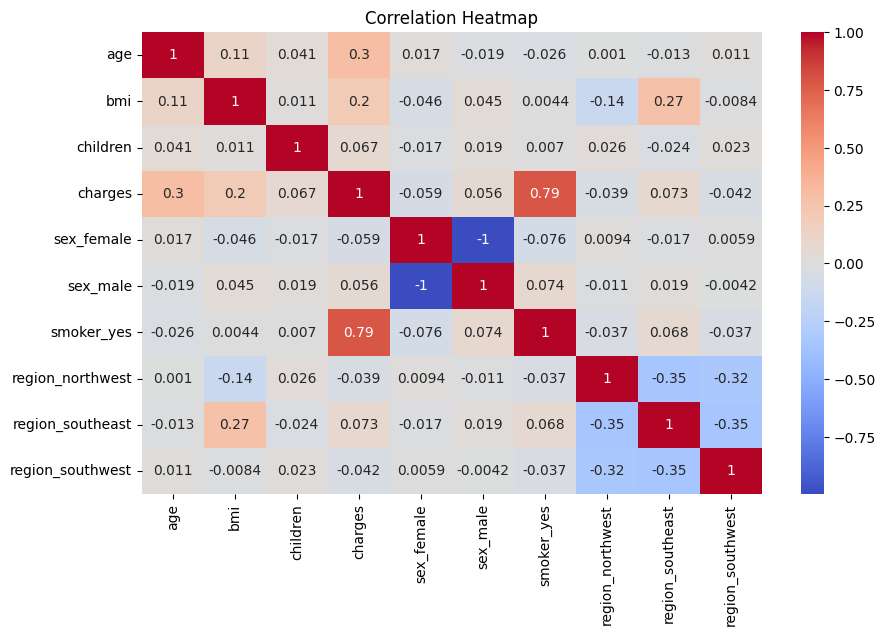

In [16]:
# Charges by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

# Charges by region
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Step 6: Multivariate Analysis

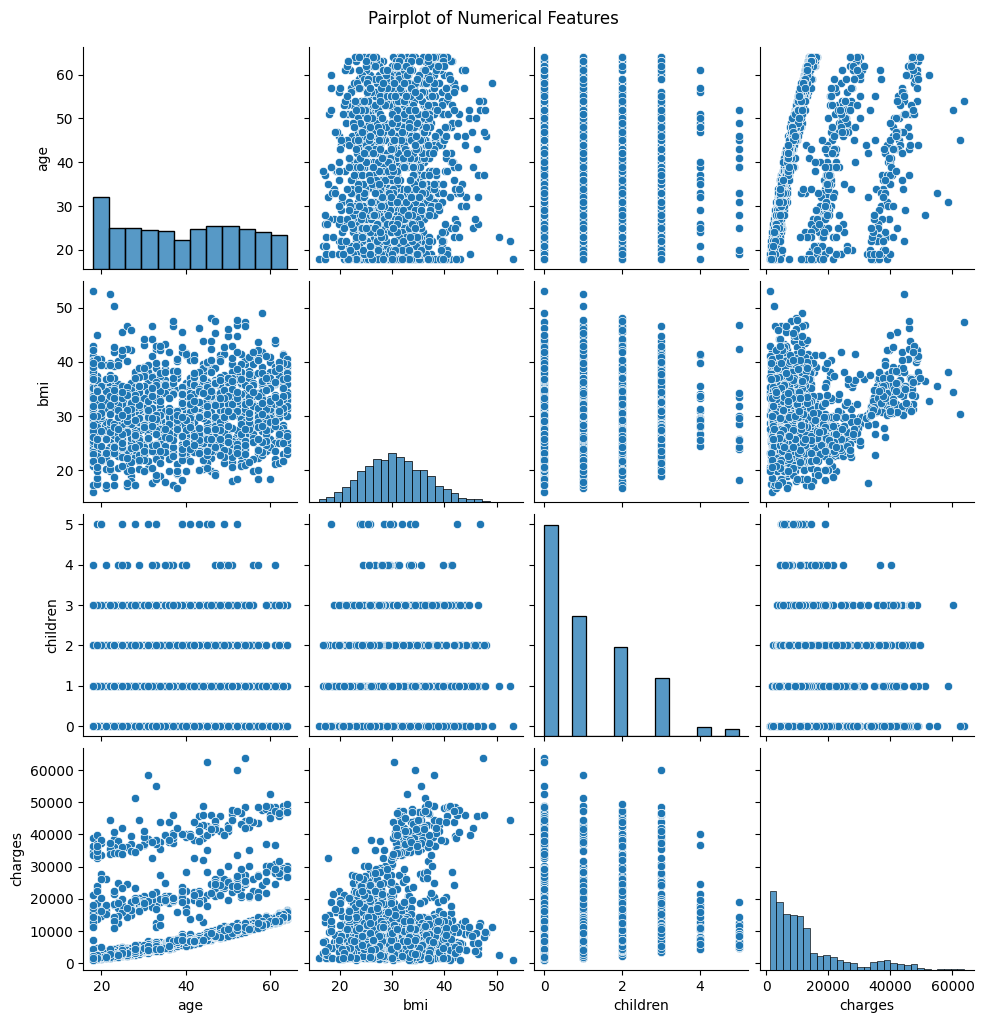

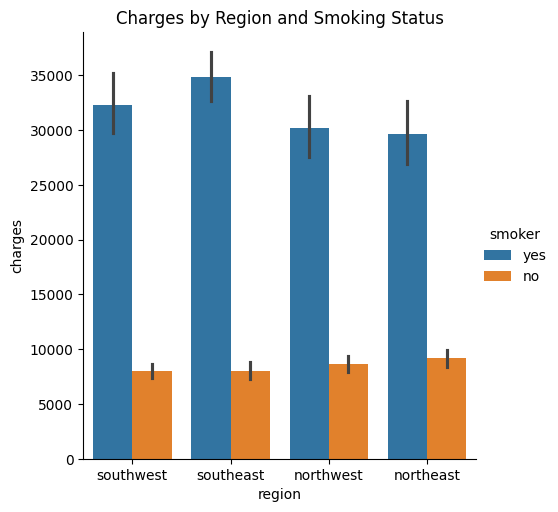

In [17]:
# Pairplot
sns.pairplot(df_encoded[['age', 'bmi', 'children', 'charges']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Charges by region and smoker
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df)
plt.title("Charges by Region and Smoking Status")
plt.show()

# Phase 2 – EDA Project Additions (22BDS0311)

## 1D Analysis – Skewness, Quantiles, Frequency Distributions

=== Skewness of Numerical Columns ===
age         0.053401
bmi         0.286869
children    0.936461
charges     1.514856
dtype: float64

=== Quantiles (Q1, Median, Q3) ===
       age      bmi  children       charges
0.25  27.0  26.2550       0.0   4746.875675
0.50  39.0  30.3600       1.0   9388.753650
0.75  51.0  34.6875       2.0  16687.364100

=== Frequency distribution for sex ===
sex
male      673
female    661
?           2
Name: count, dtype: int64

=== Frequency distribution for smoker ===
smoker
no     1061
yes     274
Name: count, dtype: int64

=== Frequency distribution for region ===
region
southeast    364
southwest    324
northwest    324
northeast    324
Name: count, dtype: int64


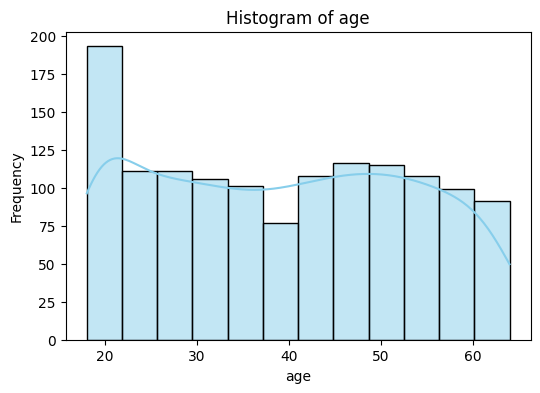

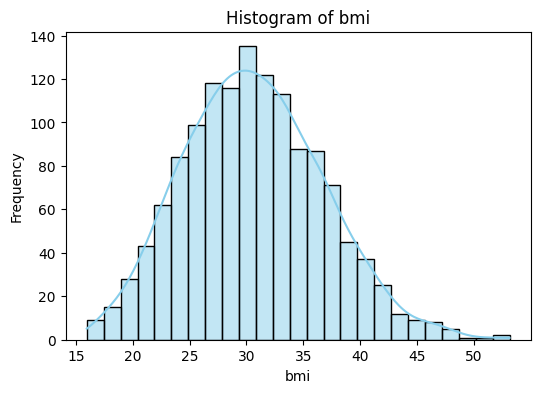

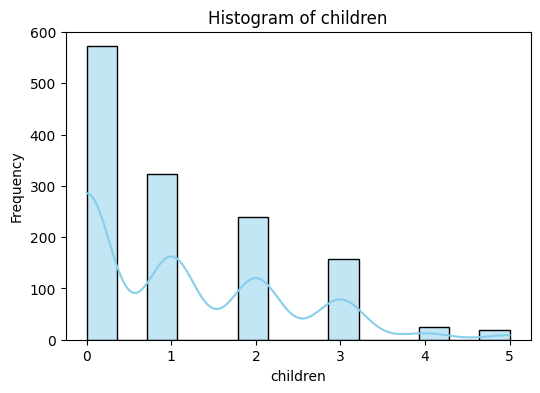

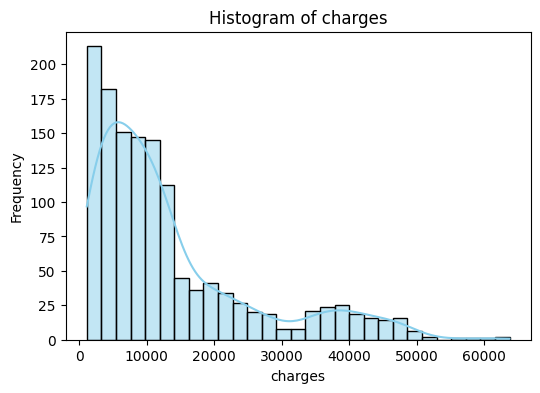

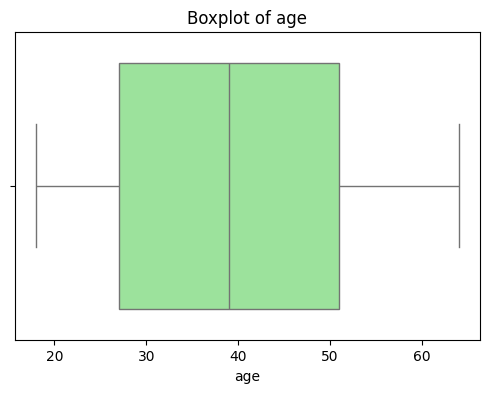

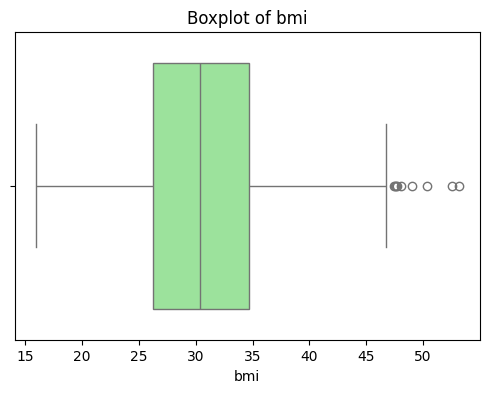

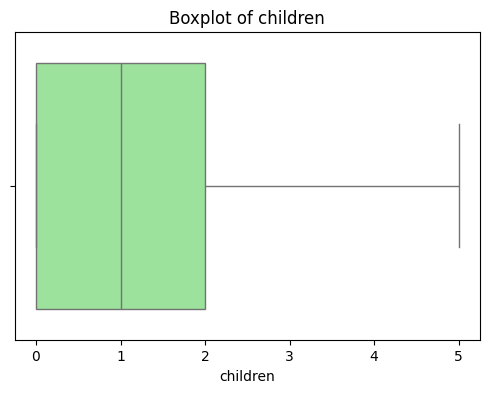

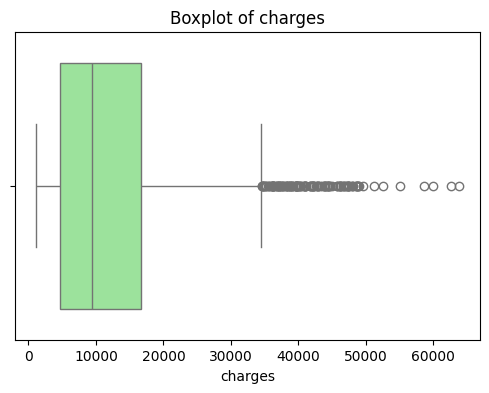

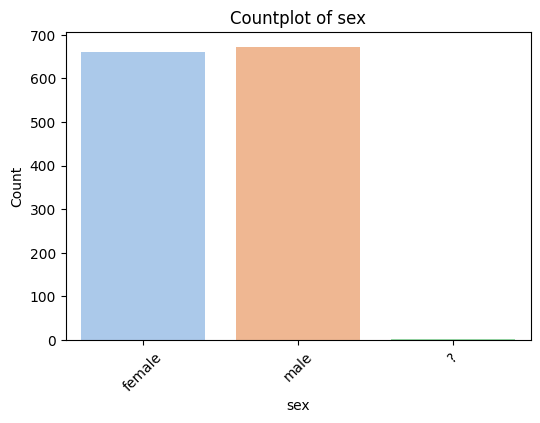

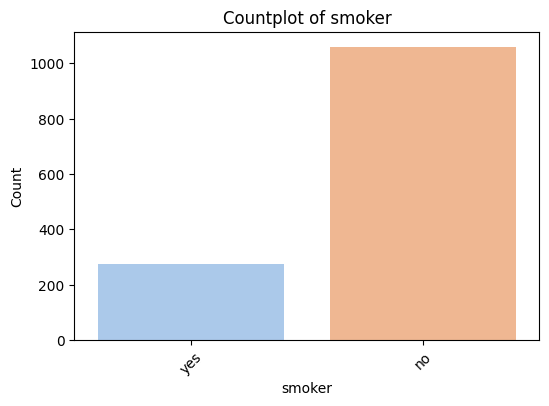

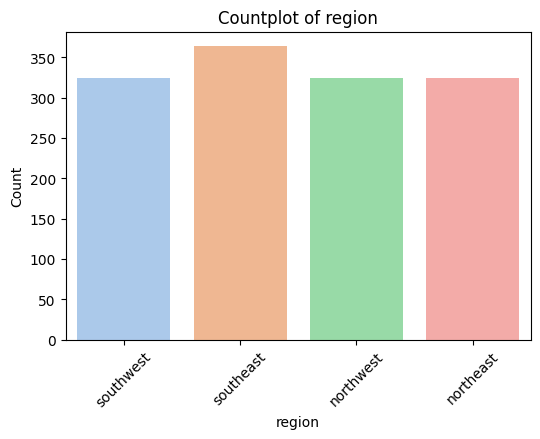

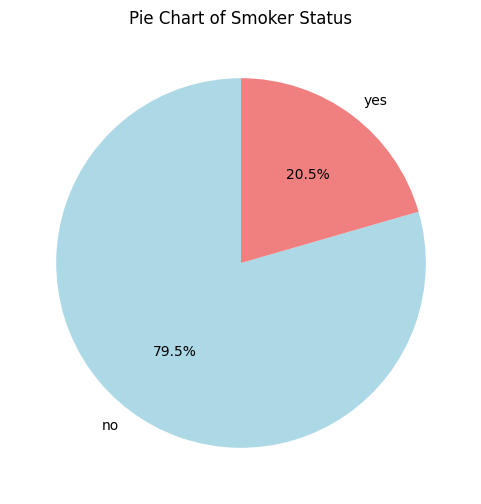

In [20]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical = ['sex', 'smoker', 'region']

# Skewness for all numerical columns
print("=== Skewness of Numerical Columns ===")
print(df.skew(numeric_only=True))

# Quantiles for all numerical columns
print("\n=== Quantiles (Q1, Median, Q3) ===")
print(df.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75]))

# Frequency distribution for categorical variables
for col in categorical:
    print(f"\n=== Frequency distribution for {col} ===")
    print(df[col].value_counts())

# ------------------------------
# Plots for 1D Analysis
# ------------------------------

# Histograms for numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for outlier visualization
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Bar plots for categorical variables
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Pie chart example for a chosen categorical variable (smoker)
plt.figure(figsize=(6,6))
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue','lightcoral'])
plt.title('Pie Chart of Smoker Status')
plt.ylabel('')
plt.show()

## 2D Analysis – Numerical vs Categorical

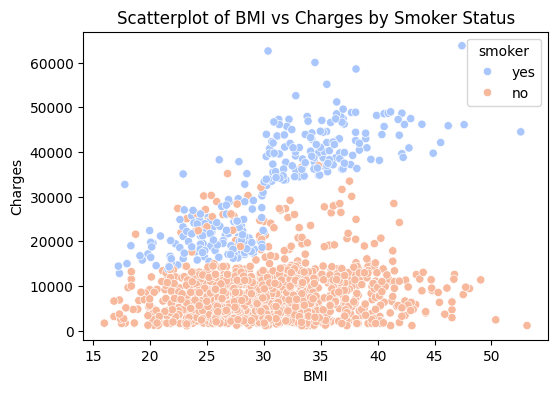

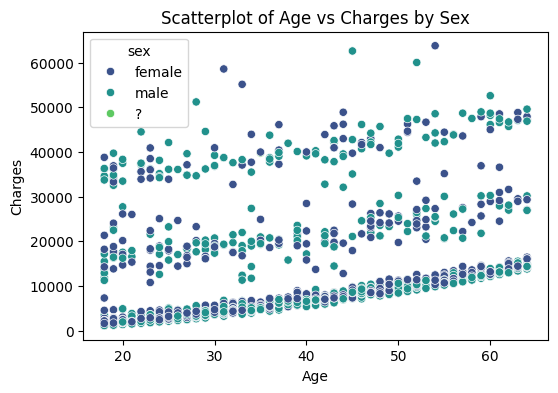

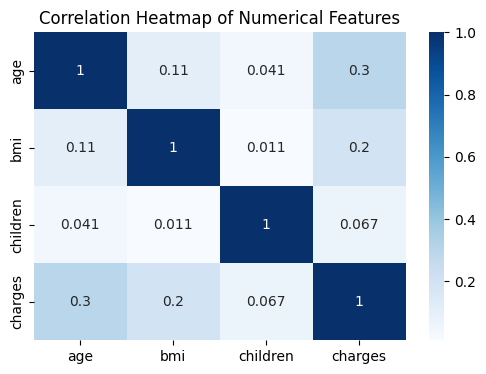

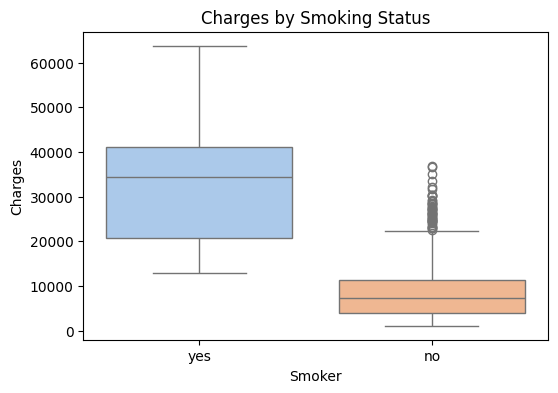

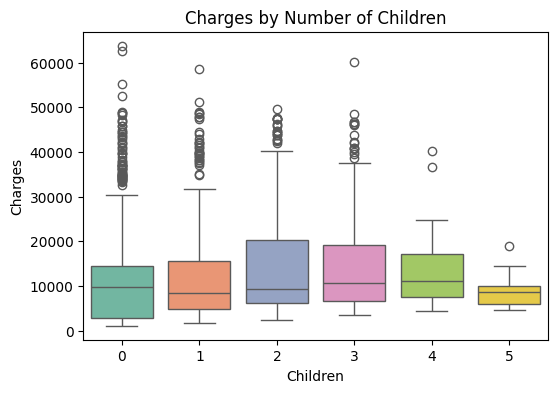

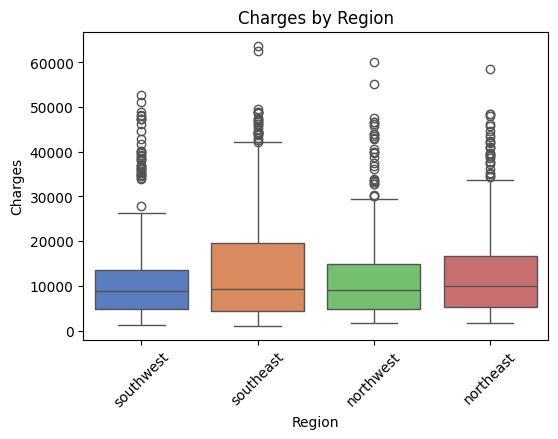


=== Crosstab: Smoker vs Region ===
region  northeast  northwest  southeast  southwest
smoker                                            
no            257        265        273        266
yes            67         58         91         58


<Figure size 600x400 with 0 Axes>

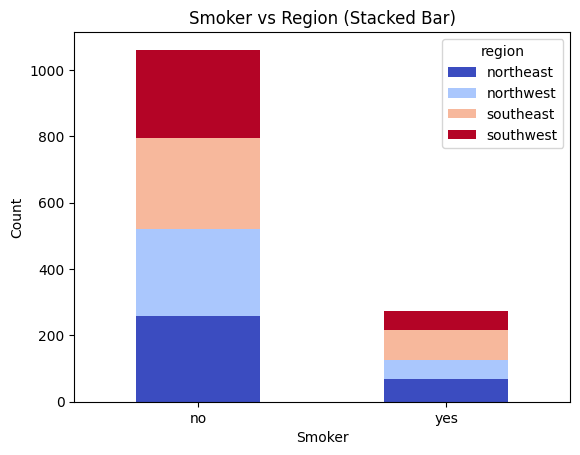


=== Crosstab: Sex vs Smoker ===
smoker   no  yes
sex             
?         1    1
female  545  115
male    515  158


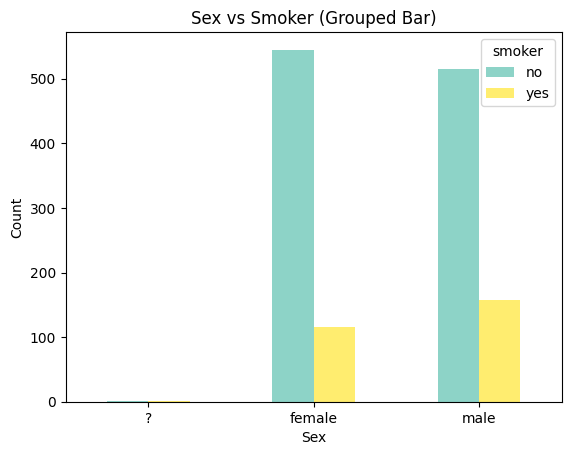

In [22]:
# ================================
# 2D Analysis – BCSE331L Phase 2
# ================================
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Numerical vs Numerical
# -------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Scatterplot of BMI vs Charges by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=df, hue='sex', palette='viridis')
plt.title('Scatterplot of Age vs Charges by Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Correlation heatmap for all numerical columns
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# -------------------------------
# Numerical vs Categorical
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='children', y='charges', data=df, palette='Set2')
plt.title('Charges by Number of Children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='region', y='charges', data=df, palette='muted')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# Categorical vs Categorical
# -------------------------------
# Crosstab of Smoker vs Region
crosstab_smoker_region = pd.crosstab(df['smoker'], df['region'])
print("\n=== Crosstab: Smoker vs Region ===")
print(crosstab_smoker_region)

plt.figure(figsize=(6,4))
crosstab_smoker_region.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Smoker vs Region (Stacked Bar)')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Crosstab of Sex vs Smoker
crosstab_sex_smoker = pd.crosstab(df['sex'], df['smoker'])
print("\n=== Crosstab: Sex vs Smoker ===")
print(crosstab_sex_smoker)

crosstab_sex_smoker.plot(kind='bar', stacked=False, colormap='Set3')
plt.title('Sex vs Smoker (Grouped Bar)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3D Analysis – Boxplot (e.g., Charges vs BMI by Smoker)

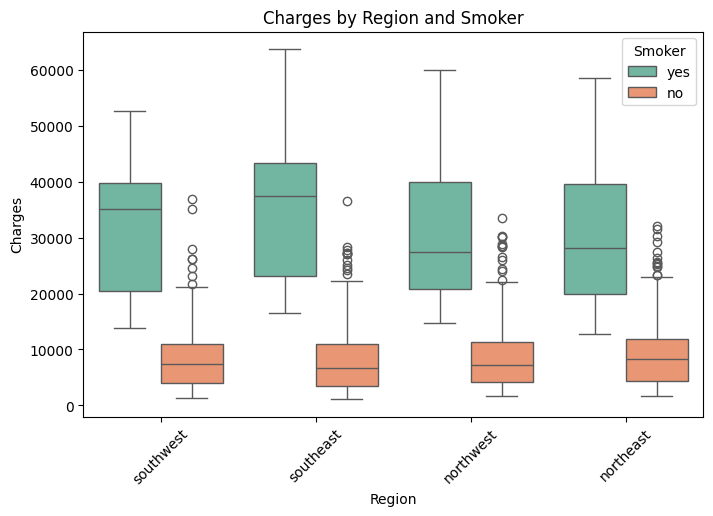

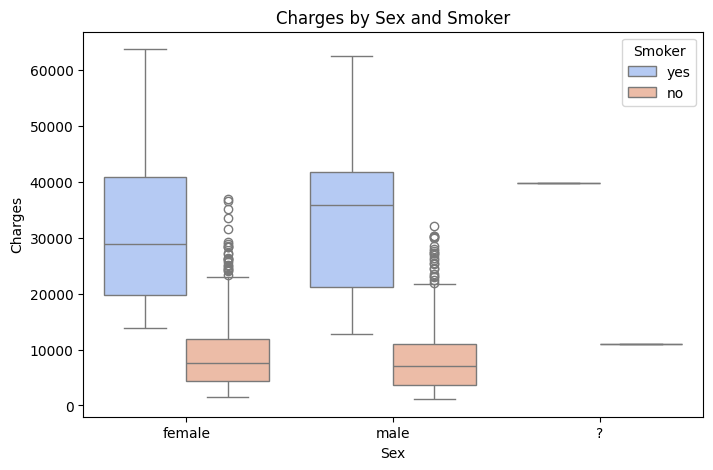

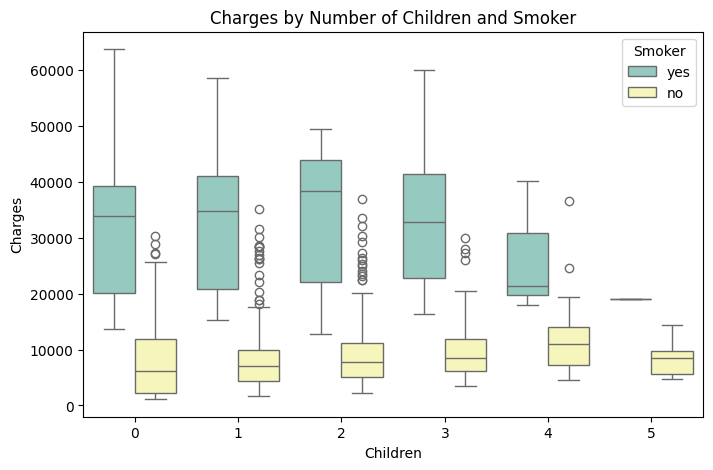

In [23]:
# Charges by Region and Smoker Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', hue='smoker', data=df, palette='Set2')
plt.title('Charges by Region and Smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.xticks(rotation=45)
plt.show()

# Charges by Sex and Smoker Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('Charges by Sex and Smoker')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

# Charges by Number of Children and Smoker Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='charges', hue='smoker', data=df, palette='Set3')
plt.title('Charges by Number of Children and Smoker')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

## Clustering Analysis – KMeans


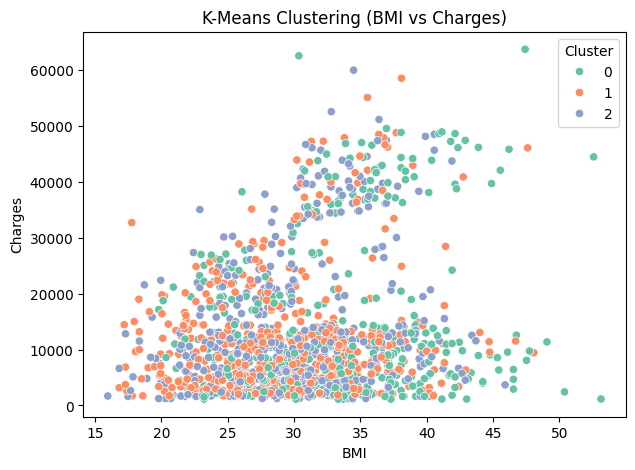

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaNs from features (charges is target for plotting)
features = df_encoded.drop('charges', axis=1).dropna()
charges_clean = df_encoded['charges'].loc[features.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init avoids warnings
clusters = kmeans.fit_predict(X_scaled)

# Add cluster info to a clean copy of df
df_clustered = df.loc[features.index].copy()
df_clustered['Cluster'] = clusters

# Visualize clusters (BMI vs Charges)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clustered, x='bmi', y='charges', hue='Cluster', palette='Set2')
plt.title("K-Means Clustering (BMI vs Charges)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()
